# Анализ спроса пассажиров на рейсы в разные города

Вы аналитик компании «F9» — это российская авиакомпания, выполняющая внутренние пассажирские авиаперевозки. Сотни перелётов каждый день. Важно понять предпочтения пользователей, покупающих билеты на те или иные направления.  
Вам предстоит изучить базу данных и проанализировать спрос пассажиров на рейсы в разные города

## Описание данных

**/datasets/query_1.csv** — результат первого запроса. В нём содержится информация о:  
- model — модели самолета  
- flights_amount — количество рейсов для каждой модели самолетов model в сентябре 2018 года  
 
**/datasets/query_3.csv** — результат третьего запроса. В нём содержится информация о:
- city — городах  
- average_flights — среднем количестве рейсов, прибывающих в город city за день в августе 2018 года 
   


## Оглавление
1. [Шаг 1. Откройте файл с данными и изучите общую информацию](#step1)  
    1.1 [Вывод к Шагу 1](#step1.1)
    
        
2. [Шаг 2. Предобработка данных и замена типа данных](#step2)  
    2.1  [Вывод к Шагу 2](#step2.1)    
    
  
    
3. [Шаг 3. Анализ данных](#step3)   
    3.1   [Топ-10 городов по количеству рейсов](#step3.1)  
    3.2   [График зависимости количества рейсов от модели самолёта](#step3.2)  
    3.3   [График зависимости количества рейсов от города](#step3.3)  
    3.4   [График зависимости количества рейсов от топ-10 городов](#step3.4)  
    3.5   [Дополнительный график зависимости количества рейсов от топ-10 городов с учётом населения](#step3.5) 
    
   
4. [Шаг 4. Общий вывод](#step4)  

### Шаг 1. Откройте файлы с данными и изучите общую информацию <a id="step1"></a>   
</div>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from IPython.display import display
import numpy as np
import seaborn as sns
import plotly.graph_objects as go

data1 = pd.read_csv('/datasets/query_1.csv')
data3 = pd.read_csv('/datasets/query_3.csv')
display(data1)
data1.info()
display(data3.head(10))

data3.info()

,model,flights_amount
0,Airbus A319-100,607
1,Airbus A321-200,960
2,Boeing 737-300,630
3,Boeing 767-300,600
4,Boeing 777-300,300
5,Bombardier CRJ-200,4446
6,Cessna 208 Caravan,4557
7,Sukhoi SuperJet-100,4185


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8 entries, 0 to 7
Data columns (total 2 columns):
model             8 non-null object
flights_amount    8 non-null int64
dtypes: int64(1), object(1)
memory usage: 256.0+ bytes


,city,average_flights
0,Абакан,3.870968
1,Анадырь,1.000000
2,Анапа,2.161290
3,Архангельск,5.354839
4,Астрахань,2.451613
5,Барнаул,2.612903
6,Белгород,6.000000
7,Белоярский,2.000000
8,Благовещенск,1.000000
9,Братск,1.000000


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 2 columns):
city               101 non-null object
average_flights    101 non-null float64
dtypes: float64(1), object(1)
memory usage: 1.7+ KB


### Вывод<a id="step1.1"></a>   
</div>  

В датасете по первому запросу у нас всего лишь 8 самолётов, а в результатах третьего запроса у нас есть 101 город. Особых замечаний по типу данных к первому датасету у нас нет. Если придираться, то в 3 датасете можно округлить среднее количество полётов `average_flights` 



### Шаг 2. Предобработка данных и замена типа данных<a id="step2"></a>   
</div>  

Проверим, нет ли у нас пропущенных значений

In [2]:
display(data1.isnull().sum())
display(data3.isnull().sum())

model             0
flights_amount    0
dtype: int64

city               0
average_flights    0
dtype: int64

Датасет полный, пропущенных значений нет.  
На всякий случай проверим: нет ли у нас задублировавшихся городов?

In [3]:
data3['city'].duplicated().sum()

0

Всё в порядке.  
Теперь, как и обещали, округлим среднее количество полётов и выведем получившуюся таблицу

In [4]:
data3['average_flights'] = data3['average_flights'].round(2)
display(data3)

,city,average_flights
0,Абакан,3.87
1,Анадырь,1.00
2,Анапа,2.16
3,Архангельск,5.35
4,Астрахань,2.45
...,...,...
96,Чита,1.58
97,Элиста,4.87
98,Южно-Сахалинск,4.29
99,Якутск,2.74


### Вывод <a id="step2.1"></a>   
</div>    

Проблем с пропущенными значениями не обнаружено. `average_flights` для общего порядка округлили. Задвоенных городов в датасете нет. Можно анализировать данные дальше.

### Шаг 3. Анализ данных<a id="step3"></a>   
</div>  

#### Найдём топ-10 городов по количеству рейсов <a id="step3.1"></a>   
</div>  

In [5]:
top10_flights = data3.sort_values('average_flights', ascending = False).head(10).reset_index(drop = True)

display(top10_flights)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


#### Построим график зависимости количества рейсов от модели самолёта <a id="step3.2"></a>   
</div>  


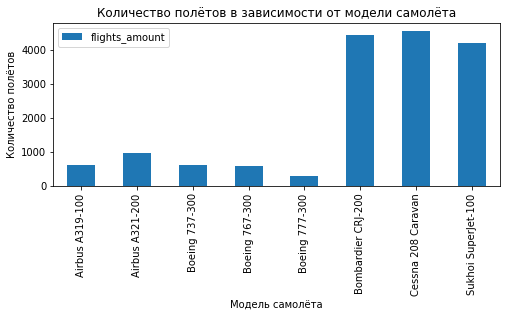

In [6]:
data1.plot(x = 'model', y = 'flights_amount', figsize = (8,3), kind = 'bar')
plt.xlabel('Модель самолёта')
plt.ylabel('Количество полётов')
plt.title('Количество полётов в зависимости от модели самолёта')
plt.show()



Из получившегося графика видно, что наиболее используемыми самолётами являются на внутренних пассажирских рейсах были **Сухой Суперджет 100** (что объясняется его лоббированием со стороны государства для внутреннего пользования), лёгкомоторный **Cessna 208** (для внутрирегиональных полётов с небольшим количеством пассажиров) и **Bombardier CRJ-200** (джет канадского производства, от части конкурирующий с **SSJ-100** засчёт схожих характеристик).

**Airbus** и **Boeing** для внутренних рейсов используются заметно реже. Их намного чаще можно встретить на междугородних рейсах. 

Проводить объединение **Airbus** и **Boeing** (к примеру с помощью Лемматизации) в данном случае нет смысла. 
1. Во-первых, в нашем распоряжении не так много данных (и видов самолётов);
2. Во-вторых, скорее интересно посмотреть на количество рейсов в зависимости от вместимости самолёта. 

Воспользовавшись данными из открытых источников (так как не всегда последние цифры означают пассажировместимость, добавим столбец `seating_capacity` в наш датасет.

In [7]:
data1['seating_capacity'] = [100,200,150,300,450,50,15,100]

In [8]:
display(data1)

,model,flights_amount,seating_capacity
0,Airbus A319-100,607,100
1,Airbus A321-200,960,200
2,Boeing 737-300,630,150
3,Boeing 767-300,600,300
4,Boeing 777-300,300,450
5,Bombardier CRJ-200,4446,50
6,Cessna 208 Caravan,4557,15
7,Sukhoi SuperJet-100,4185,100


In [9]:
data1_pivot = data1.pivot_table(index = 'seating_capacity', values = 'flights_amount', aggfunc = 'sum')

In [10]:
display(data1_pivot)

,flights_amount
seating_capacity,
15,4557
50,4446
100,4792
150,630
200,960
300,600
450,300


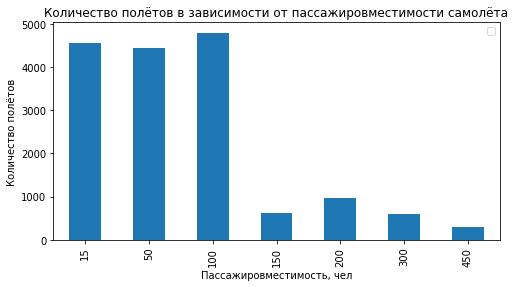

In [11]:
data1_pivot.plot(figsize = (8,4),kind = 'bar')
plt.legend('')
plt.xlabel('Пассажировместимость, чел')
plt.ylabel('Количество полётов')
plt.title('Количество полётов в зависимости от пассажировместимости самолёта')
plt.show()


Таким образом можно из получившихся графиков можно подтвердить наш вывод выше, что на внутренних рейсах наиболее востребованы самолёты с пассажировместимостью до 100 человек. 

#### Построим график зависимости количества рейсов от города <a id="step3.3"></a>   
</div>  


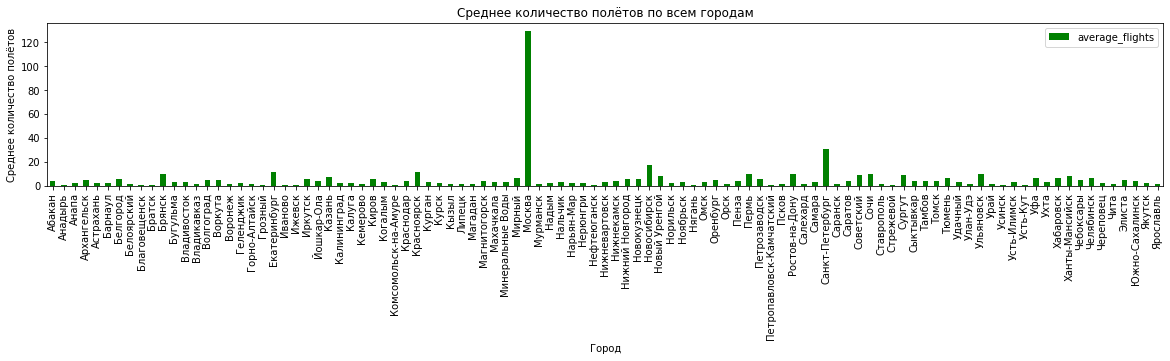

In [12]:
data3.plot(x = 'city', y = 'average_flights', figsize = (20,3), kind = 'bar', color = 'green')
plt.xlabel('Город')
plt.ylabel('Среднее количество полётов')
plt.title('Среднее количество полётов по всем городам')
plt.show()

**Москва**, как крупнейший хаб страны заметно выделяется на фоне остальных городов.

Рассмотрим иной график распределения, а также рассмотрим "ящик с усами" для количества полётов

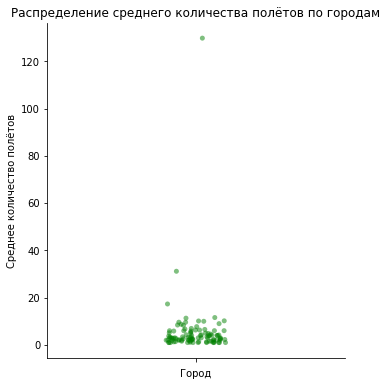

In [13]:
sns.catplot(y='average_flights', data = data3, orient='v', color = 'green', alpha = 0.5)
plt.xlabel('Город')
plt.ylabel('Среднее количество полётов')
plt.title('Распределение среднего количества полётов по городам')
plt.show()


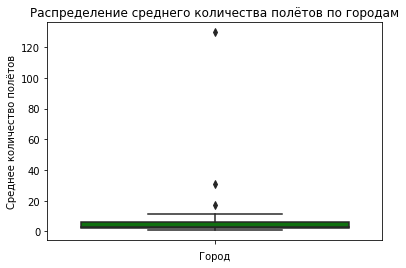

'Разброс значений, среднее количество и медиана по городам'

count    101.000000
mean       5.493663
std       13.119346
min        1.000000
25%        2.000000
50%        3.000000
75%        5.870000
max      129.770000
Name: average_flights, dtype: float64

In [14]:
sns.boxplot('average_flights', data = data3, color = 'green', orient = 'v')
plt.xlabel('Город')
plt.ylabel('Среднее количество полётов')
plt.title('Распределение среднего количества полётов по городам')
plt.show()
display('Разброс значений, среднее количество и медиана по городам')
display(data3['average_flights'].describe())

Из графика распределения и "ящика с усами" видно, что большинство городов принимает до **6 рейсов** в день. Лидерство Москвы неоспоримо, трафик Санкт-Петербурга (как туристического и культурного центра и хабов на рейсы в Северную Европу) или городов Сибири (как потенциальных хабов для рейсов в Азию) заметно проигрывает столице. 

#### Построим график зависимости количества рейсов от топ-10 городов <a id="step3.4"></a>   
</div>  

Ещё раз выведем топ-10 городов

In [15]:
display(top10_flights)

,city,average_flights
0,Москва,129.77
1,Санкт-Петербург,31.16
2,Новосибирск,17.32
3,Красноярск,11.58
4,Екатеринбург,11.32
5,Ростов-на-Дону,10.19
6,Пермь,10.13
7,Брянск,10.00
8,Сочи,9.61
9,Ульяновск,9.58


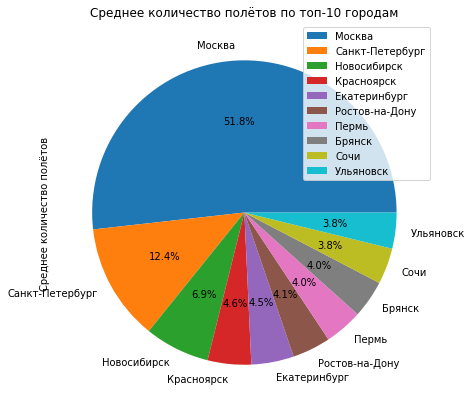

In [16]:
fig, ax = plt.subplots(figsize = (7,7))
ax.pie(top10_flights['average_flights'], labels=top10_flights['city'], autopct='%1.1f%%')
plt.title('Среднее количество полётов по топ-10 городам')
plt.ylabel('Среднее количество полётов')
plt.legend(top10_flights['city'])
plt.show()




Как видно из круговой диаграммы, Москва забирает более 50% от общего числа рейсов в топ-10 городов. Выводы здесь такие же, как и в целом для всех городов в общем датасете.  
Теперь построим распределение для топ-10 городов и "ящик с усами".

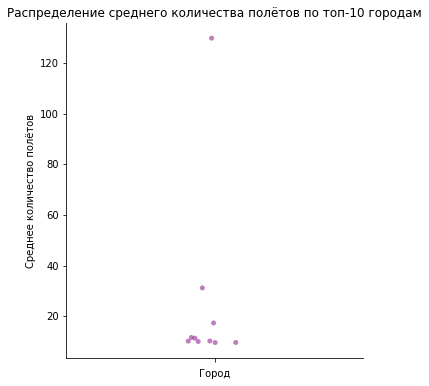

In [17]:
sns.catplot(y='average_flights', data = top10_flights, orient='v', color = 'purple', alpha = 0.5)
plt.xlabel('Город')
plt.ylabel('Среднее количество полётов')
plt.title('Распределение среднего количества полётов по топ-10 городам')
plt.show()

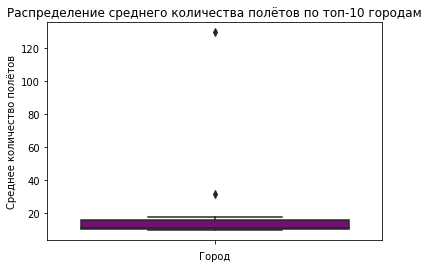

'Разброс значений, среднее количество и медиана по топ-10 городам'

count     10.000000
mean      25.066000
std       37.388289
min        9.580000
25%       10.032500
50%       10.755000
75%       15.885000
max      129.770000
Name: average_flights, dtype: float64

In [18]:
sns.boxplot('average_flights', data = top10_flights, color = 'purple', orient = 'v')
plt.xlabel('Город')
plt.ylabel('Среднее количество полётов')
plt.title('Распределение среднего количества полётов по топ-10 городам')
plt.show()
display('Разброс значений, среднее количество и медиана по топ-10 городам')
display(top10_flights['average_flights'].describe())

Медианное количество рейсов возросло до 25. Но основная масса городов из топ-10 совершает не больше **16 рейсов**.     

Для дополнительного исследования добавим к нашей таблице население в этих городах и посчитаем соотношение количества рейсов к населению (предварительно добавив его в таблицу с порядком ***(тыс. чел)***. Данные по населению возьмём за 2018 год, так как учитываем сентябрьские рейсы этого же года.

#### Дополнительный график зависимости количества рейсов от топ-10 городов с учётом населения <a id="step3.5"></a>   
</div>  

In [19]:
top10_flights['population'] = [12506,5352,1613,1091,1469,1130,1052,406,424,627]
top10_flights['ratio'] = (top10_flights['average_flights']/top10_flights['population']).round(4)
top10_flights.sort_values('ratio', ascending = False)

,city,average_flights,population,ratio
7,Брянск,10.00,406,0.0246
8,Сочи,9.61,424,0.0227
9,Ульяновск,9.58,627,0.0153
2,Новосибирск,17.32,1613,0.0107
3,Красноярск,11.58,1091,0.0106
0,Москва,129.77,12506,0.0104
6,Пермь,10.13,1052,0.0096
5,Ростов-на-Дону,10.19,1130,0.0090
4,Екатеринбург,11.32,1469,0.0077
1,Санкт-Петербург,31.16,5352,0.0058


Построим линейных график для получившейся таблицы, выведем значение столбца `ratio`

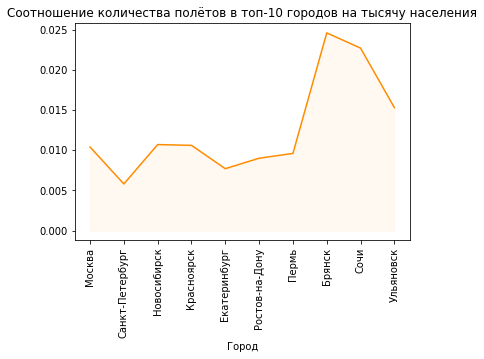

In [20]:
plt.plot(top10_flights['city'], top10_flights['ratio'], c = "darkorange")
plt.fill_between(top10_flights['city'], top10_flights['ratio'], where = top10_flights['ratio'] >=0, color = 'darkorange', alpha = 0.05)  
plt.title('Соотношение количества полётов в топ-10 городов на тысячу населения')
plt.xlabel('Город')
plt.xticks(rotation='vertical') 
plt.show()

Из полученных таблицы и графика можно отметить следующее:
1. Соотношение в **Сочи** мы можем объяснить тем, что этот город является туристическим центром почти круглый год (летом - море и треккинг, зимой - лыжи и сноуборд);
2. Значительное падение **Москвы** в относительных цифрах находит своё объяснение в огромной численности населения города. Даже статус крупнейшго хаба не спасает столицу;
3. Наблюдаются интересные аномалии в относительных цифрах для **Брянска** и **Ульяновска**. Было бы неплохо посмотреть на них в другие месяца, является ли это сезонным эффектом или подобное прослеживается весь год;
4. **Санкт-Петербург**, как и Москва, растерял свои позиции. При этом в культурной столице рейсов меньше в 4 раза, а население - в 2,5 раза. Отсюда и падение;
5. Подровнялись с Москвой в относительных значениях *остальные города* из топ-10. 

### Шаг 4. Общий вывод  <a id="step4"></a>   
</div>  

1. Мы получили для анализа сравнительно небольшой датасет без существенных ошибок.  

2. Была проведена проверка на пропущенные значения и дублирующие строки.

3. Найдены топ-10 городов по числу совершаемых рейсов.
4. Построены графики зависимостей моделей самолётов и количества рейсов, города и количества рейсов, топ-10 городов и количества рейсов.  
5. Дополнительно построен график зависимости количества рейсов в топ-10 городов с учётом их населения.


На основной вопрос о количестве рейсов в города, где проходят крупнейшие фестивали мы ответили в других частях исследования. 

В данном разделе мы:
- Подтвердили статус **Москвы** как крупнейшего хаба для нашей страны;
- Отметили большую численность рейсов с пассажировместимостью до 100 человек;
- Сделали вывод, что самолёты крупных авиастроителей не так широко представлены на внутренних рейсах, как на международных
- Выявили, что в большинство городов России было совершено в среднем **6 рейсов** в день в сентябре 2018 года, для топ-10 городов это число составляет **16 рейсов**.
- Выявили интересную статистическую аномалию относительного количества рейсов для **Брянска** и **Ульяновска**.